In [1]:
import rasterio as rio
from rasterio.plot import show
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# from mayavi import mlab


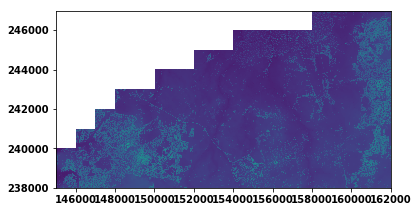

In [2]:
# DSM
fp = r'C:\Users\Andrew\Desktop\becode_projects\3D-Houses\DHMVIIDSMRAS1m_k01\GeoTIFF\DHMVIIDSMRAS1m_k01.tif'
DSM_img = rio.open(fp)
show(DSM_img)
t = DSM_img.read()

In [5]:
print(type(DSM_img))

<class 'rasterio.io.DatasetReader'>


In [6]:
# No. of bands
print(DSM_img.count)

# Image resolution
print(DSM_img.height, DSM_img.width)

# Co-ordinate Reference System
DSM_img.crs

1
9000 17000


CRS.from_epsg(31370)

In [7]:
DSM_array = DSM_img.read(1, masked = True) # Masked=True will mask all no data values
DSM_array

masked_array(
  data=[[--, --, --, ..., 12.75, 12.789999961853027, 12.800000190734863],
        [--, --, --, ..., 12.800000190734863, 12.8100004196167,
         12.84000015258789],
        [--, --, --, ..., 12.84000015258789, 12.829999923706055,
         12.880000114440918],
        ...,
        [4.519999980926514, 4.550000190734863, 4.570000171661377, ...,
         16.799999237060547, 16.93000030517578, 16.899999618530273],
        [4.489999771118164, 4.570000171661377, 4.579999923706055, ...,
         16.90999984741211, 16.90999984741211, 16.950000762939453],
        [4.480000019073486, 4.550000190734863, 4.570000171661377, ...,
         16.8700008392334, 16.8799991607666, 16.90999984741211]],
  mask=[[ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False

In [8]:
DSM_array.shape

(9000, 17000)

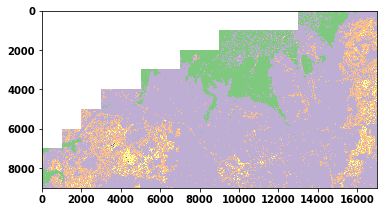

In [9]:
plt.imshow(DSM_array, cmap='Accent')
plt.show() 

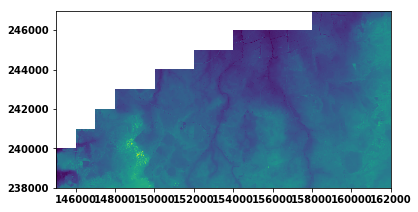

In [10]:
# DTM
fpt = r'C:\Users\Andrew\Desktop\becode_projects\3D-Houses\DHMVIIDTMRAS1m_k01\GeoTIFF\DHMVIIDTMRAS1m_k01.tif'
DTM_img = rio.open(fpt)
show(DTM_img)

In [11]:
# No. of bands
print(DTM_img.count)

# Image resolution
print(DTM_img.height, DTM_img.width)

# Co-ordinate Reference System
DTM_img.crs

1
9000 17000


CRS.from_epsg(31370)

In [12]:
DTM_array = DTM_img.read(1, masked = True)
DTM_array

masked_array(
  data=[[--, --, --, ..., 12.75, 12.789999961853027, 12.800000190734863],
        [--, --, --, ..., 12.800000190734863, 12.8100004196167,
         12.84000015258789],
        [--, --, --, ..., 12.84000015258789, 12.829999923706055,
         12.880000114440918],
        ...,
        [4.519999980926514, 4.550000190734863, 4.570000171661377, ...,
         16.799999237060547, 16.93000030517578, 16.899999618530273],
        [4.489999771118164, 4.570000171661377, 4.579999923706055, ...,
         16.90999984741211, 16.90999984741211, 16.93000030517578],
        [4.480000019073486, 4.550000190734863, 4.570000171661377, ...,
         16.860000610351562, 16.8799991607666, 16.899999618530273]],
  mask=[[ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, Fal

In [13]:
# Cannopy Height Model
canopy_imarray = DSM_array - DTM_array
canopy_imarray

masked_array(
  data=[[--, --, --, ..., 0.0, 0.0, 0.0],
        [--, --, --, ..., 0.0, 0.0, 0.0],
        [--, --, --, ..., 0.0, 0.0, 0.0],
        ...,
        [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.020000457763671875],
        [0.0, 0.0, 0.0, ..., 0.010000228881835938, 0.0,
         0.010000228881835938]],
  mask=[[ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],
  fill_value=-9999.0,
  dtype=float32)

In [14]:
# 3-D Plot

# Assigning the x, y and z values
x = DSM_img.height #height
y = DSM_img.width  #width
z =                #elevation  

# creating a figure for plotting
fig = plt.figure(figsize=(10,10))

# Creating plot
ax = fig.add_subplot(111, projection='3d')
dem3d = ax.plot_surface(x,y,z, cmap='afmhot', linewidth=0)

# Showing the above plot
plt.show()

SyntaxError: invalid syntax (<ipython-input-14-9c9f9d781f85>, line 6)

In [ ]:
# # Plotting using Mayavi
# mlab.init_notebook()
# mlab.figure(size=(640, 800), bgcolor=(0.16, 0.28, 0.46))
# mlab.surf(DSM_array, warp_scale=0.2) 
# mlab.show()

In [ ]:
# # To get the latitude, longitude from the .tif file
# import pandas as pd
# with rio.open(r'C:\Users\Andrew\Desktop\becode_projects\3D-Houses\DHMVIIDSMRAS1m_k01\GeoTIFF\DHMVIIDSMRAS1m_k01.tif') as dataset:
#     val = dataset.read(1) # band 1
#     no_data=dataset.nodata
#     data = [(dataset.xy(x,y)[0],dataset.xy(x,y)[1],val[x,y]) for x,y in np.ndindex(val.shape) if val[x,y] != no_data]
#     lon = [i[0] for i in data]
#     lat = [i[1] for i in data]
#     d = [i[2] for i in data]
#     res = pd.DataFrame({"long":lon,'lat':lat,"data":v})
# res.head()